Capital Asset Pricing Model is a foundational model in finance that describes the relationship between the expected return of an asset and its systematic risk, measured by beta (β).\
 It assumes that investors are rational and markets are efficient.\
 **E(Ri)=Rf+βi​*(E(RM)−Rf)**\
Here,

*   E(Ri) stands for *expected returns on asset i*
*   Rf stands for *risk free rate*
*   β *Sensitivity of asset i*    to market returns
*   Rm stands for *expected returns of the market*



In [41]:
#Downaloding required libraries
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.ticker as mticker

In [42]:
end_date=dt.date.today()
start_date = start_date= end_date-timedelta(days=365*5)#5 years
ticker=input('Write thr ticker fort all ther stocks(for example:RELIANCE.NS)')
#Raw data donwlaoding
raw_data=yf.download(ticker,start=start_date,end=end_date)
#Extracting Adj close data
data=raw_data['Adj Close'] if 'Adj Close' in raw_data.columns.get_level_values(0) else raw_data['Close']
#ensuring our data is a Dataframe with tickers as columns
if isinstance(data,pd.Series):
    data=data.to_frame()
#Raw data donwlaoding for NSE
raw_data_M=yf.download('^NSEI',start=start_date,end=end_date)
#Extracting Adj close data
data_M=raw_data_M['Adj Close'] if 'Adj Close' in raw_data_M.columns.get_level_values(0) else raw_data_M['Close']
#ensuring our data is a Dataframe with tickers as columns
if isinstance(data_M,pd.Series):
    data_M=data_M.to_frame()
data_rf= yf.download('^TNX', start=start_date, end=end_date)['Close'].mean()

data['NIFTY50'] = data_M
"""HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,TCS.NS"""#you can copy paste this or put your own tickers as well


Write thr ticker fort all ther stocks(for example:RELIANCE.NS)HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,TCS.NS


/tmp/ipython-input-42-872961947.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data=yf.download(ticker,start=start_date,end=end_date)
[*********************100%***********************]  4 of 4 completed
/tmp/ipython-input-42-872961947.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data_M=yf.download('^NSEI',start=start_date,end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-42-872961947.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_rf= yf.download('^TNX', start=start_date, end=end_date)['Close'].mean()
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-42-872961947.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

'HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,TCS.NS'

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2020-07-29 to 2025-07-25
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HDFCBANK.NS    1238 non-null   float64
 1   HINDUNILVR.NS  1238 non-null   float64
 2   INFY.NS        1238 non-null   float64
 3   TCS.NS         1238 non-null   float64
 4   NIFTY50        1237 non-null   float64
dtypes: float64(5)
memory usage: 58.0 KB


In [44]:
returns=data.pct_change().dropna()

/tmp/ipython-input-44-2982003220.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns=data.pct_change().dropna()


In [45]:
returns

Ticker,HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,TCS.NS,NIFTY50
Date,,,,,
2020-07-30,-0.013103,-0.011792,0.007651,0.001516,-0.008989
2020-07-31,-0.016989,0.006513,0.004732,0.000834,-0.002585
2020-08-03,-0.029822,-0.002444,-0.009420,-0.011945,-0.016422
2020-08-04,0.039571,-0.003039,-0.007368,-0.001974,0.018698
2020-08-05,-0.013536,-0.001479,-0.005422,0.004356,0.000577
...,...,...,...,...,...
2025-07-21,0.022019,-0.009921,-0.001135,-0.009938,0.004898
2025-07-22,0.003299,0.006004,-0.008458,0.000443,-0.001188
2025-07-23,0.008570,-0.011816,0.002292,0.006172,0.006345


In [46]:
returns.iloc[:,1:].mean()

,0
Ticker,
HINDUNILVR.NS,0.000211
INFY.NS,0.000586
TCS.NS,0.000408
NIFTY50,0.000686


In [47]:
excess_returns = returns.iloc[:, 1:].subtract(returns.iloc[:, 0], axis=0)

In [48]:


# Prepare the data for regression
X = returns['NIFTY50']
y = returns.drop('NIFTY50', axis=1)

# Add a constant for the intercept (Alpha)
X = sm.add_constant(X)

# Calculate Alpha and Beta for each stock
for column in y.columns:
    model = sm.OLS(y[column], X).fit()
    alpha = model.params['const']
    beta = model.params['NIFTY50']
    print(f"Ticker: {column}")
    print(f"Alpha: {alpha}")
    print(f"Beta: {beta}")
    print("-" * 20)

Ticker: HDFCBANK.NS
Alpha: -8.14230484668858e-05
Beta: 1.0712986800546729
--------------------
Ticker: HINDUNILVR.NS
Alpha: -0.00012124147174189164
Beta: 0.485054676194543
--------------------
Ticker: INFY.NS
Alpha: -4.607531737080573e-05
Beta: 0.9215294582503196
--------------------
Ticker: TCS.NS
Alpha: -0.00010815438138506401
Beta: 0.7531481621703278
--------------------


calculating betas indivisually(with the help of a plot)


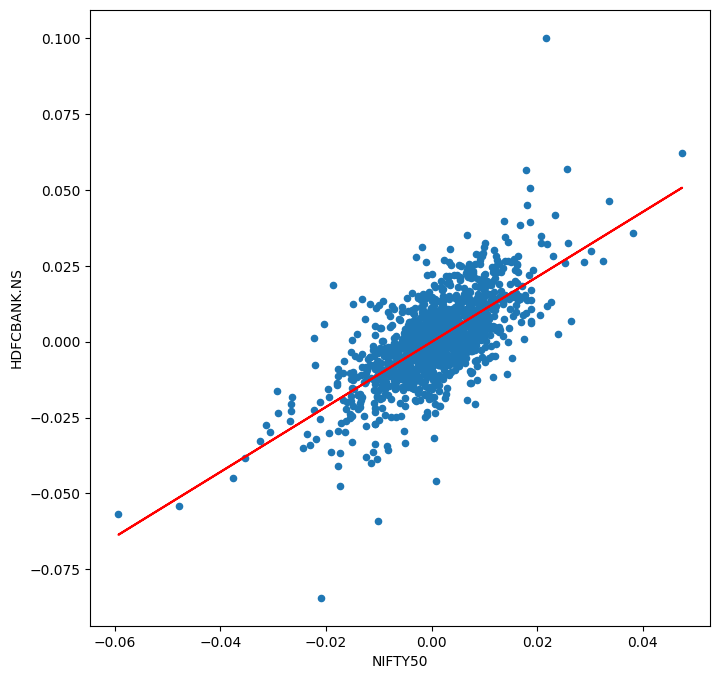

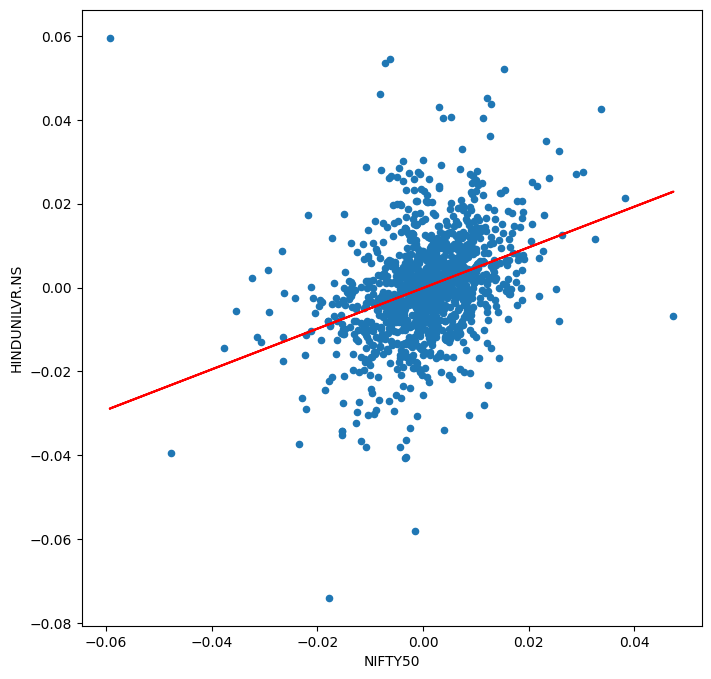

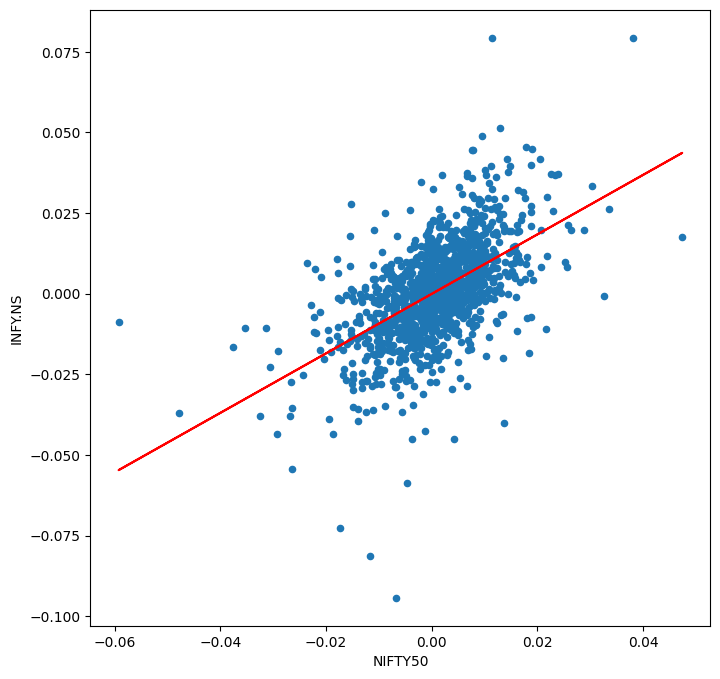

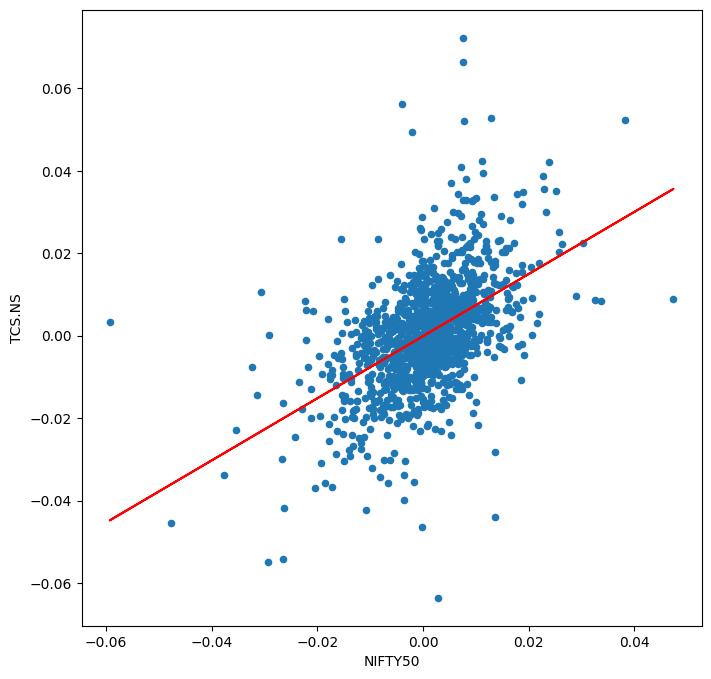

In [49]:
beta={}
alpha={}
for i in returns.columns:
    if i !='Date' and i !='NIFTY50':
        returns.plot(kind = 'scatter', x = 'NIFTY50', y = i,figsize=(8, 8))
        b, a = np.polyfit(returns['NIFTY50'], returns[i], 1)
        plt.plot(returns['NIFTY50'], b * returns['NIFTY50'] + a, '-', color = 'r')
        beta[i]=b
        alpha[i]=a

In [50]:
rm = round(returns['NIFTY50'].mean() * 252,3)
print(f'Average Market Returns are: {rm:6.2%}')

Average Market Returns are: 17.30%


In [51]:
rf=data_rf/100
rf

,0
Ticker,
^TNX,0.030758


Calculating Returns using CAPM


In [52]:
keys=list(beta.keys())
ER={}
# Ensure rf is a scalar for the calculation
rf_scalar = rf.iloc[0]

for i in keys:
    ER[i]=rf_scalar+(beta[i]*(rm-rf_scalar))


for i in keys:
  print('Expected Return Based on CAPM for {} is {:.2%}'.format(i, ER[i]))

Expected Return Based on CAPM for HDFCBANK.NS is 18.31%
Expected Return Based on CAPM for HINDUNILVR.NS is 9.98%
Expected Return Based on CAPM for INFY.NS is 16.18%
Expected Return Based on CAPM for TCS.NS is 13.79%


In [53]:
actual_returns = returns.mean() *252

In [54]:
comparison = pd.DataFrame({
    'Actual Return': actual_returns,
    'CAPM Expected Return': pd.Series(ER)
})
comparison['Excess over CAPM'] = comparison['Actual Return'] - comparison['CAPM Expected Return']

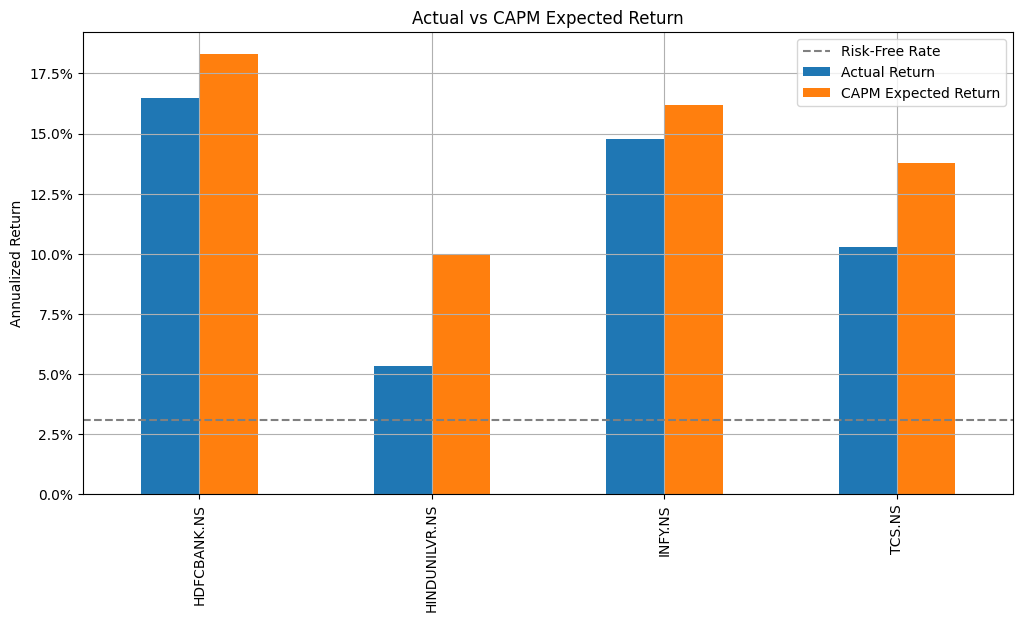

In [55]:


comparison[['Actual Return', 'CAPM Expected Return']].drop('NIFTY50').plot(
    kind='bar',
    figsize=(12, 6),
    title='Actual vs CAPM Expected Return'
)
plt.ylabel("Annualized Return")
plt.axhline(y=rf.iloc[0], color='gray', linestyle='--', label='Risk-Free Rate')
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
plt.legend()
plt.grid(True)
plt.show()

Hence, we can conclude that CAPM is not the best model to predict the returns generated by a stock,as CAPM is a theoretical concept and doesn't really accounts for everything\
* First and foremost, It assumes Alpha as 0\
* CAPM includes no friction from the markets,like:taxes,transaction costs,etc\

This project was made to understand CAPM futher and try to implement the knowledge gained from reading the textbook "Active Portfolio Management by Richard C. Grinold and Ronald N. Kahn"